# Lectura y graficación de la señal EMG capturada

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re

## Abrimos el archivo txt para ver  el contenido

In [14]:
f = open("signal_emg.txt","r")
raw_data = f.readlines()[1]  # Leer la línea con la información de la señal
f.close()

raw_data

'# {"98:D3:71:FD:62:1F": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1F", "device connection": "BTH98:D3:71:FD:62:1F", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-4-5", "time": "11:50:6.769", "channels": [1], "sensor": ["EMGBITREV"], "label": ["A1"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n'

In [15]:
## Regex para extraer la frecuencia
x = re.findall("[0-5][0-9][0-9]\d", raw_data)[0]

print(x)

1000


In [16]:
Fs = float(x)
Ts=1/Fs # Determinar el periodo de muestreo

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leyendo el archivo excluyendo las primeras 3 filas

In [17]:
array = np.genfromtxt("./signal_emg.txt", delimiter="\t",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 509.,  nan],
       [  1.,   0.,   0., ...,   0., 511.,  nan],
       [  2.,   0.,   0., ...,   0., 511.,  nan],
       ...,
       [  5.,   0.,   0., ...,   0., 512.,  nan],
       [  6.,   0.,   0., ...,   0., 508.,  nan],
       [  7.,   0.,   0., ...,   0., 509.,  nan]])

## Ploteamos la lectura

[0.00493315 0.01134566 0.01134566 ... 0.01455192 0.00172689 0.00493315]


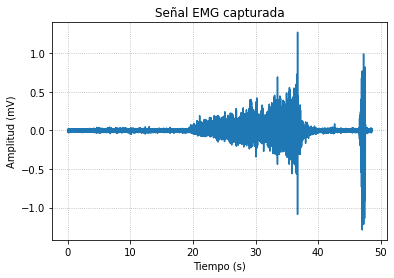

In [56]:
bits = 10 # Bits de la salida 
volt_range = 3.28 #Rango de voltaje en milivoltios (-1.64; 1.64) mV
# Extraer la penultima columna (datos)
y = (array[: ,-2] * volt_range/(2**bits - 1)) # convertir los bits a mV
y = y - np.mean(y) # Centrar la señal, ya que va de -1.64 a 1.64
t = np.arange(0, len(y)*Ts, Ts) # Crear vector de tiempo considerando periodo de muestreo
print(y)
plt.plot(t, y, label="señal") # Señal completa
plt.title("Señal EMG capturada")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)") 
plt.ylabel("Amplitud (mV)")
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('complete_signal.png', transparent=False, )
plt.show()

C:\Users\eduma\AppData\Local\Temp/ipykernel_11128/3766785603.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1); plt.plot(t, y); plt.title("Reposo"); plt.xlim(9, 10); plt.ylim(-0.1, 0.1);


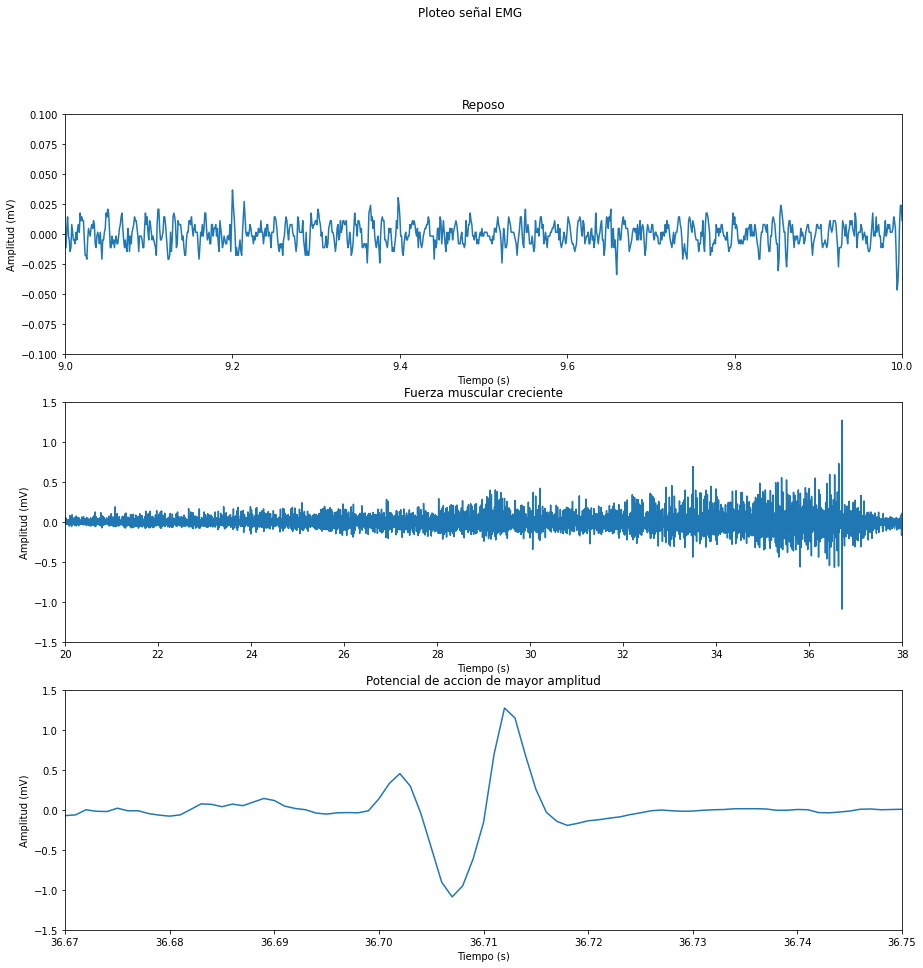

In [53]:
# Ploteo de señales de interes
fig2 = plt.figure(figsize=(15,15))
fig2.suptitle('Ploteo señal EMG')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
#1
plt.subplot(3, 1, 1); plt.plot(t, y); plt.title("Reposo"); plt.xlim(9, 10); plt.ylim(-0.1, 0.1);
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
#2
plt.subplot(3, 1, 2); plt.plot(t, y); plt.title("Fuerza muscular creciente");
plt.xlim(20, 38); plt.ylim(-1.5, 1.5)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
#3
plt.subplot(3, 1, 3); plt.plot(t, y);
plt.title("Potencial de accion de mayor amplitud");plt.xlim(36.67, 36.75); plt.ylim(-1.5, 1.5)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
fig = plt.gcf()
fig.set_facecolor('white')
plt.savefig('emg.png', transparent=False, )

## Dominio de la frecuencia

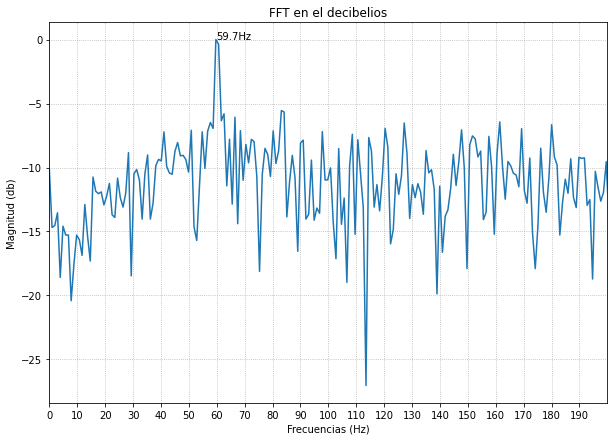

In [54]:
N = 2**bits                                    

signal1 = y

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)  
plt.plot(F_list, signal_fft_db)
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
fig = plt.gcf()
fig.set_facecolor('white')
fig.set_size_inches(10, 7)
plt.savefig('fft.png', transparent=False, )
plt.show()
